<a href="https://colab.research.google.com/github/ShambhaviBhandari/Break-Through-Tech-Salesforce-1a/blob/Chris's-branch/BTT_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo Show

## Import everything we need

In [ ]:
import gradio as gr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gradio as gr
import pandas as pd, numpy as np, os
import pickle, shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Load Data and Models

In [ ]:
feat_df = pd.read_csv('/content/drive/MyDrive/BTT_Proj/data/feat_df.csv')
result_df = pd.read_csv('/content/drive/MyDrive/BTT_Proj/data/result_df.csv')

In [ ]:
feat_df.index = pd.to_datetime(feat_df['Date'])
feat_df = feat_df.drop(columns = 'Date')

In [ ]:
feat_df.columns

Index(['Close_t+1', 'Open_t+1', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Rolling_Close_mean_3', 'Rolling_High_mean_3', 'Rolling_Low_mean_3',
       'Rolling_Open_mean_3', 'Rolling_Volume_mean_3', 'Rolling_Close_mean_5',
       'Rolling_High_mean_5', 'Rolling_Low_mean_5', 'Rolling_Open_mean_5',
       'Rolling_Volume_mean_5', 'Rolling_Close_mean_10',
       'Rolling_High_mean_10', 'Rolling_Low_mean_10', 'Rolling_Open_mean_10',
       'Rolling_Volume_mean_10', 'Rolling_Close_mean_20',
       'Rolling_High_mean_20', 'Rolling_Low_mean_20', 'Rolling_Open_mean_20',
       'Rolling_Volume_mean_20', 'ln(Close_t+1/Close_t)',
       'ln(Open_t+1/Close_t)', 'sent_pos_mean_CNBC', 'sent_pos_mean_Guardian',
       'sent_pos_mean_Reuters', 'sent_neg_mean_CNBC', 'sent_neg_mean_Guardian',
       'sent_neg_mean_Reuters', 'sent_neu_mean_CNBC', 'sent_neu_mean_Guardian',
       'sent_neu_mean_Reuters', 'n_headlines_CNBC', 'n_headlines_Guardian',
       'n_headlines_Reuters', 'n_strong_pos_CNBC', '

In [ ]:
model_Lasso = pickle.load(open('/content/drive/MyDrive/BTT_Proj/models/model_Lasso.pkl', 'rb'))
model_RF = pickle.load(open('/content/drive/MyDrive/BTT_Proj/models/model_RF.pkl', 'rb'))
model_XGB = pickle.load(open('/content/drive/MyDrive/BTT_Proj/models/model_XGB.pkl', 'rb'))

models_dict = {
    'Lasso': model_Lasso,
    'Random Forest': model_RF,
    'XGBoost': model_XGB
}

available_models = list(models_dict.keys())
available_dates_str = [d.strftime('%Y-%m-%d') for d in feat_df.index]
y = feat_df['Open_t+1']

In [ ]:
y

,Open_t+1
Date,
2017-12-18,2692.709961
2017-12-19,2688.179932
2017-12-20,2683.020020
2017-12-21,2684.219971
2017-12-22,2679.090088
...,...
2020-07-13,3141.110107
2020-07-14,3225.979980
2020-07-15,3208.360107


In [ ]:
feat_df = feat_df.drop(columns = ['Open_t+1', 'ln(Open_t+1/Close_t)', 'Close_t+1', 'ln(Close_t+1/Close_t)'])

In [ ]:
if 'scaler' not in globals():
    print("Warning: 'scaler' variable not found. Attempting to load default...")
    try:
        scaler = pickle.load(open('/content/drive/MyDrive/BTT_Proj/models/scaler.pkl', 'rb'))
    except:
        print("Error: Scaler not found. Lasso prediction might fail if scaler is missing.")
feat_df

,Close,High,Low,Open,Volume,Rolling_Close_mean_3,Rolling_High_mean_3,Rolling_Low_mean_3,Rolling_Open_mean_3,Rolling_Volume_mean_3,...,sent_neu_mean_Reuters,n_headlines_CNBC,n_headlines_Guardian,n_headlines_Reuters,n_strong_pos_CNBC,n_strong_pos_Guardian,n_strong_pos_Reuters,n_strong_neg_CNBC,n_strong_neg_Guardian,n_strong_neg_Reuters
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-18,2690.159912,2694.969971,2685.919922,2685.919922,3727770000,2672.659993,2680.896647,2665.689941,2670.806641,4.302480e+09,...,0.000000,0.0,40.0,0.0,0.0,2.0,0.0,0.0,11.0,0.0
2017-12-19,2681.469971,2694.439941,2680.739990,2692.709961,3407680000,2682.479980,2689.679932,2675.266602,2679.753255,4.290787e+09,...,0.000000,0.0,20.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
2017-12-20,2679.250000,2691.010010,2676.110107,2688.179932,3246230000,2683.626628,2693.473307,2680.923340,2688.936605,3.460560e+09,...,0.000000,0.0,20.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
2017-12-21,2684.570068,2692.639893,2682.399902,2683.020020,3293130000,2681.763346,2692.696615,2679.750000,2687.969971,3.315680e+09,...,0.000000,0.0,20.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2017-12-22,2683.340088,2685.350098,2678.129883,2684.219971,2401030000,2682.386719,2689.666667,2678.879964,2685.139974,2.980130e+09,...,0.000000,3.0,20.0,0.0,0.0,2.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-13,3155.219971,3235.320068,3149.429932,3205.080078,4902440000,3164.103353,3200.640055,3133.783285,3177.906657,4.756760e+09,...,0.423877,5.0,20.0,60.0,0.0,1.0,7.0,2.0,9.0,15.0
2020-07-14,3197.520020,3200.949951,3127.659912,3141.110107,4507140000,3179.260010,3207.696696,3137.769938,3166.220052,4.644590e+09,...,0.372953,3.0,20.0,91.0,0.0,3.0,7.0,1.0,2.0,25.0
2020-07-15,3226.560059,3238.280029,3200.760010,3225.979980,4686830000,3193.100016,3224.850016,3159.283285,3190.723389,4.698803e+09,...,0.367110,4.0,40.0,79.0,1.0,1.0,11.0,0.0,13.0,16.0


In [ ]:
X = feat_df.copy()
split_idx = int(len(y) * 0.8)
X_train, y_train = X.iloc[:split_idx], y.iloc[:split_idx]
X_test, y_test = X.iloc[split_idx:], y.iloc[split_idx:]

## Profit Demo Show

In [ ]:
# profit = pd.DataFrame()


In [ ]:
# ==========================================
# STEP 1: OVERNIGHT STRATEGY FUNCTION
# ==========================================


def run_overnight_strategy(model_name, start_date_str, end_date_str, initial_cash):
    """
    Strategy:
    1. At Day T Close: Predict Day T+1 Open.
    2. If Bullish: Buy at Day T Close.
    3. Settlement: Sell at Day T+1 Open (Actual y).
    """

    # 1. Validation & Slicing
    if start_date_str >= end_date_str:
        return "Error: Start Date must be earlier than End Date.", None

    try:
        # Features for prediction
        period_df = feat_df.loc[start_date_str:end_date_str]
        # Actual Next Open Prices for profit calc
        period_y = y.loc[start_date_str:end_date_str]
    except:
        return "Error: Date slicing failed.", None

    if period_df.empty:
        return "Error: No data.", None

    # 2. Initialization
    selected_model = models_dict[model_name]
    cash = float(initial_cash)

    history_dates = []
    history_equity = [] # Equity Curve

    # 3. Loop through each trading day
    for current_date in period_df.index:

        row = period_df.loc[current_date]

        # === A. Define Prices ===
        # Cost Price: We buy at Today's Close
        # (Assuming row['Close'] is the raw price. If scaled, use original df)
        buy_price_at_close = row['Close']

        # Sell Price: We sell at Tomorrow's Actual Open (y)
        sell_price_at_next_open = period_y.loc[current_date]

        # === B. Prediction ===
        features = row.values.reshape(1, -1)
        if model_name == 'Lasso':
            features = scaler.transform(features)

        try:
            pred_next_open = selected_model.predict(features)
            pred_next_open = float(pred_next_open if np.ndim(pred_next_open)==0 else pred_next_open[0])
        except:
            continue

        # === C. Execution Logic (Overnight Trade) ===

        # Logic: If Predicted Next Open > Current Close -> Gap Up Expected
        if pred_next_open > buy_price_at_close:
            # ACTION: BUY at Close, SELL at Next Open
            # 1. Calculate how many shares we can buy
            shares = cash / buy_price_at_close

            # 2. Immediate Settlement (Simulating selling at next morning)
            # New Cash = Shares * Actual Next Open
            cash = shares * sell_price_at_next_open

            # Note: We don't hold positions during the day.
            # We are purely trading the overnight gap.

        else:
            # ACTION: Do Nothing (Hold Cash)
            # Cash remains the same
            pass

        # Record Equity
        history_dates.append(current_date)
        history_equity.append(cash)

    # 4. Final Report
    final_equity = history_equity[-1]
    total_profit = final_equity - initial_cash
    return_rate = (total_profit / initial_cash) * 100

    report = (
        f"--- Overnight Gap Strategy ---\n"
        f"Logic: Buy at Close -> Sell at Next Actual Open (y)\n"
        f"Model: {model_name}\n"
        f"Period: {start_date_str} to {end_date_str}\n"
        f"--------------------------\n"
        f"Initial Cash: ${initial_cash:,.2f}\n"
        f"Final Equity: ${final_equity:,.2f}\n"
        f"Total Profit: ${total_profit:,.2f}\n"
        f"Return Rate:  {return_rate:.2f}%\n"
    )

    # 5. Plot
    fig = plt.figure(figsize=(8, 6))
    # profit['Date'] = history_dates
    # profit[f'{model_name}'] = history_equity
    plt.plot(history_dates, history_equity, label='Account Value', color='green', linewidth=1.5)
    plt.axhline(y=initial_cash, color='red', linestyle='--', label='Initial Capital')
    plt.title(f"Profit Strategy: Buy Close -> Sell Next Open ({model_name})")
    plt.xlabel("Date")
    plt.ylabel("Cash Value ($)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    # image_save_dir = '/content/drive/MyDrive/BTT_Proj/images'
    # save_path = os.path.join(image_save_dir, f'{name}.png')
    # plt.savefig(save_path, dpi=300, bbox_inches='tight')

    return report, fig

In [ ]:
# run_overnight_strategy('XGBoost', np.min(y_train.index), np.max(y_test.index), 10000)
# run_overnight_strategy('Lasso', np.min(y_train.index), np.max(y_test.index), 10000)
# run_overnight_strategy('Random Forest', np.min(y_train.index), np.max(y_test.index), 10000)

In [ ]:
# plt.figure(figsize=(10, 4))
# for name in profit.columns[1:]:
#     plt.plot(profit['Date'], profit[name], label=name)
# plt.legend()
# plt.title(f'Earning Compare', fontsize=14)
# image_save_dir = '/content/drive/MyDrive/BTT_Proj/images'
# save_path = os.path.join(image_save_dir, f'all_earning.png')
# plt.savefig(save_path, dpi=300, bbox_inches='tight')

In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("# 🌙 Overnight Gap Strategy Backtest")
    gr.Markdown("Tests the model's ability to profit from the gap between **Today's Close** and **Tomorrow's Open**.")

    with gr.Row():
        model_dd = gr.Dropdown(choices=available_models, label="Model", value=available_models[0])
        start_dd = gr.Dropdown(choices=available_dates_str, label="Start Date", value=available_dates_str[0])
        end_dd = gr.Dropdown(choices=available_dates_str, label="End Date", value=available_dates_str[min(30, len(available_dates_str)-1)])
        cash_in = gr.Number(value=10000, label="Capital")

    btn = gr.Button("Run Backtest", variant="primary")

    with gr.Row():
        out_txt = gr.Textbox(lines = 10, label="Report")
        out_plot = gr.Plot(label="Performance Curve")

    btn.click(run_overnight_strategy, [model_dd, start_dd, end_dd, cash_in], [out_txt, out_plot])

demo.launch(debug=False)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3605476d75ad7a77ca.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Visualization

In [ ]:
X = feat_df.copy()
split_idx = int(len(y) * 0.8)
X_train, y_train = X.iloc[:split_idx], y.iloc[:split_idx]
X_test, y_test = X.iloc[split_idx:], y.iloc[split_idx:]
predictions = {}
metrics = []

In [ ]:
y_train_pred =pd.Series(model_XGB.predict(X_train), index = X_train.index)
y_test_pred = pd.Series(model_XGB.predict(X_test), index = X_test.index)


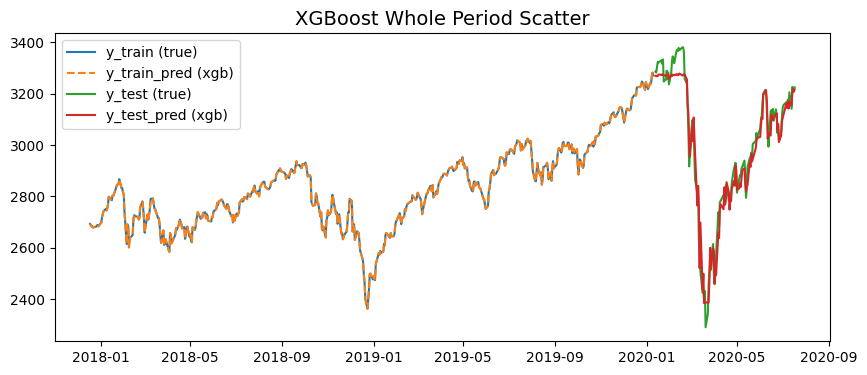

In [ ]:

plt.figure(figsize=(10, 4))
plt.plot(y_train.index, y_train, label="y_train (true)")
plt.plot(y_train.index, y_train_pred, ls = '--', label="y_train_pred (xgb)")
plt.plot(y_test.index, y_test, label="y_test (true)")
plt.plot(y_test.index, y_test_pred, label="y_test_pred (xgb)")
plt.legend()
plt.title(f'XGBoost Whole Period Scatter', fontsize=14)
image_save_dir = '/content/drive/MyDrive/BTT_Proj/images'
save_path = os.path.join(image_save_dir, f'XGB_whole_period.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
# plt.show()

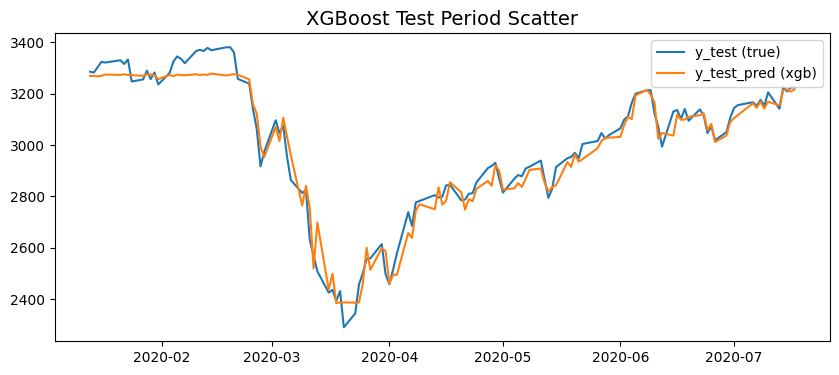

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(y_test.index, y_test, label="y_test (true)")
plt.plot(y_test.index, y_test_pred, label="y_test_pred (xgb)")
plt.legend()
plt.title(f'XGBoost Test Period Scatter', fontsize=14)
# plt.show()
image_save_dir = '/content/drive/MyDrive/BTT_Proj/images'
save_path = os.path.join(image_save_dir, f'XGB_test.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

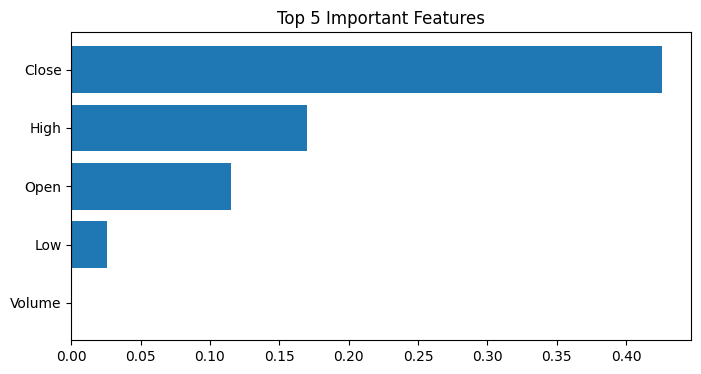

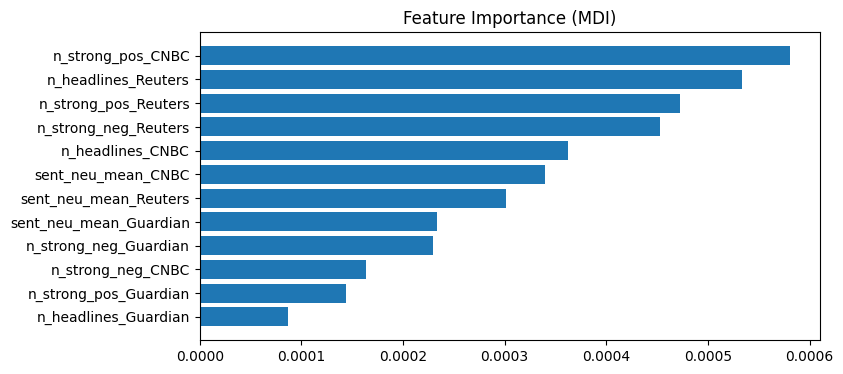

In [ ]:
feature_importance = model_XGB.feature_importances_
sorted_idx = np.argsort(feature_importance)
sorted_idx_high = sorted_idx[sorted_idx < 5]
sorted_idx_low = sorted_idx[sorted_idx > 30]
pos_high = np.arange(sorted_idx_high.shape[0]) + 0.5
pos_low = np.arange(sorted_idx_low.shape[0]) + 0.5
fig = plt.figure(figsize=(8,4))
plt.barh(pos_high, feature_importance[sorted_idx_high] , align="center")
plt.yticks(pos_high, np.array(X.columns)[sorted_idx_high])
plt.title("Top 5 Important Features")
image_save_dir = '/content/drive/MyDrive/BTT_Proj/images'
save_path = os.path.join(image_save_dir, f'Top_5_features.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
fig = plt.figure(figsize=(8,4))
plt.barh(pos_low, feature_importance[sorted_idx_low] , align="center")
plt.yticks(pos_low, np.array(X.columns)[sorted_idx_low])
plt.title("Feature Importance (MDI)");

Saving images to: /content/drive/MyDrive/BTT_Proj/images
Running predictions...
Generating Performance Dashboard...
Saved: /content/drive/MyDrive/BTT_Proj/images/model_performance_dashboard.png


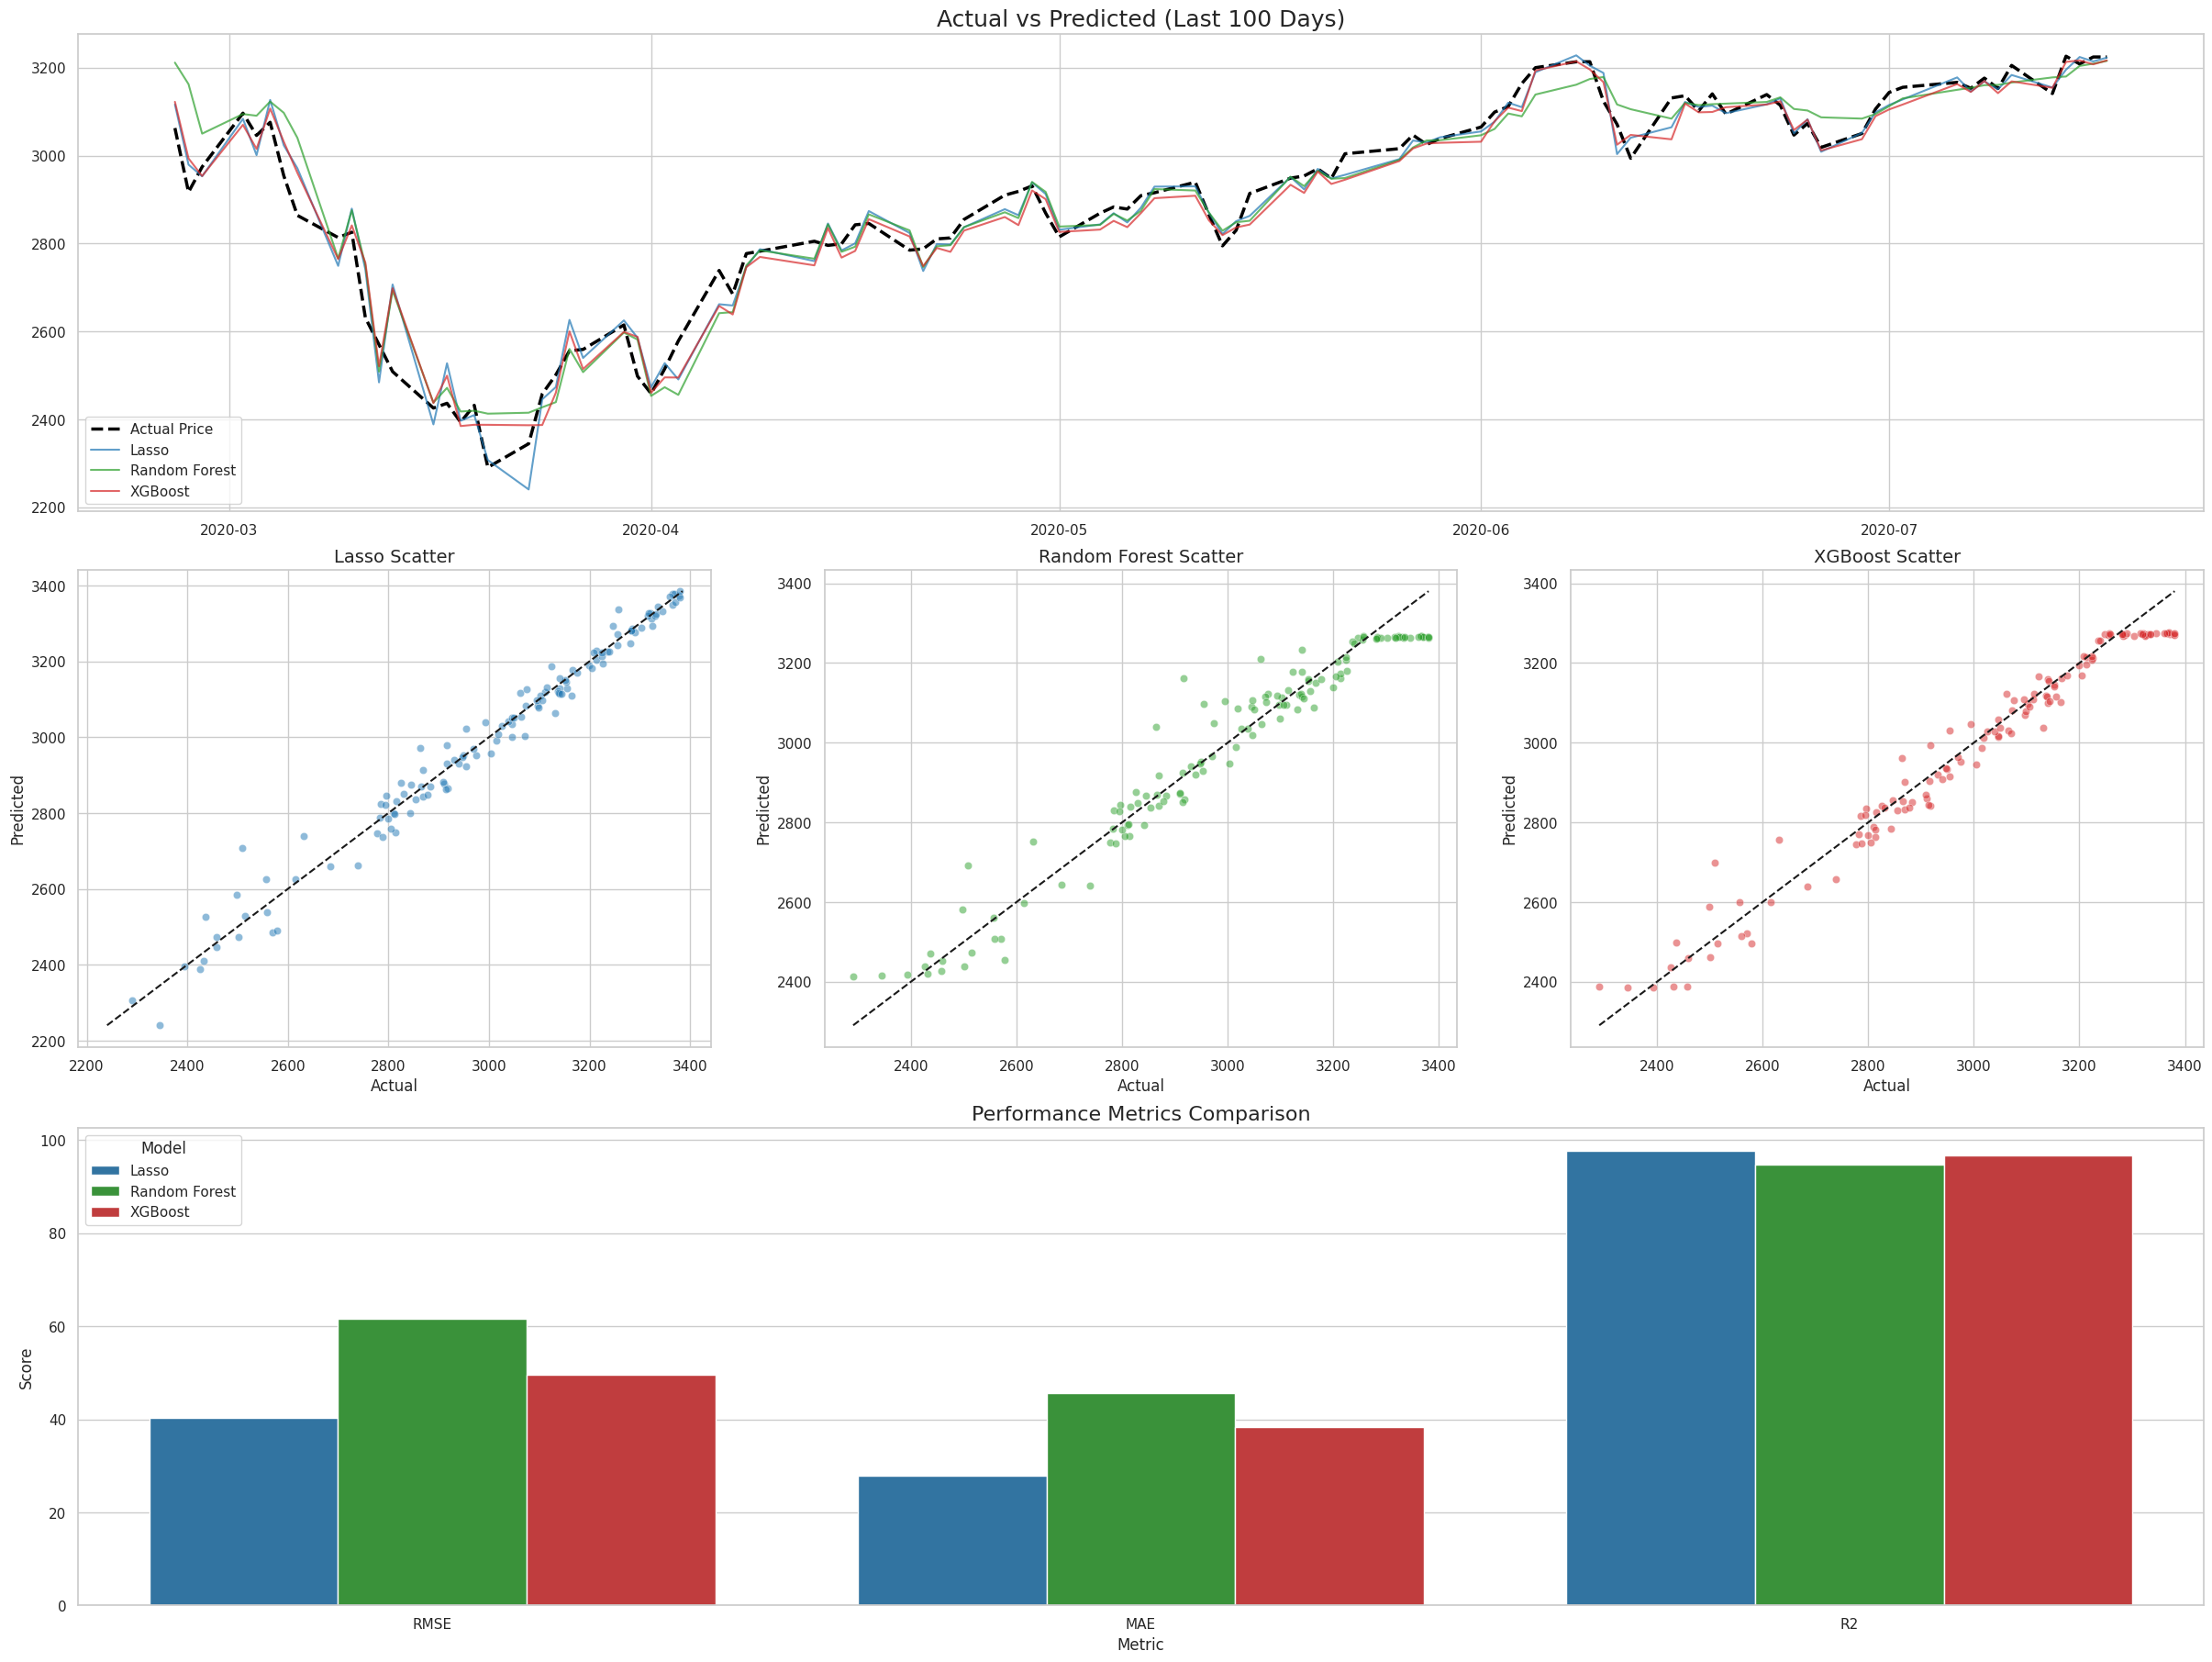


Generating Heatmap...
Saved: /content/drive/MyDrive/BTT_Proj/images/feature_heatmap.png


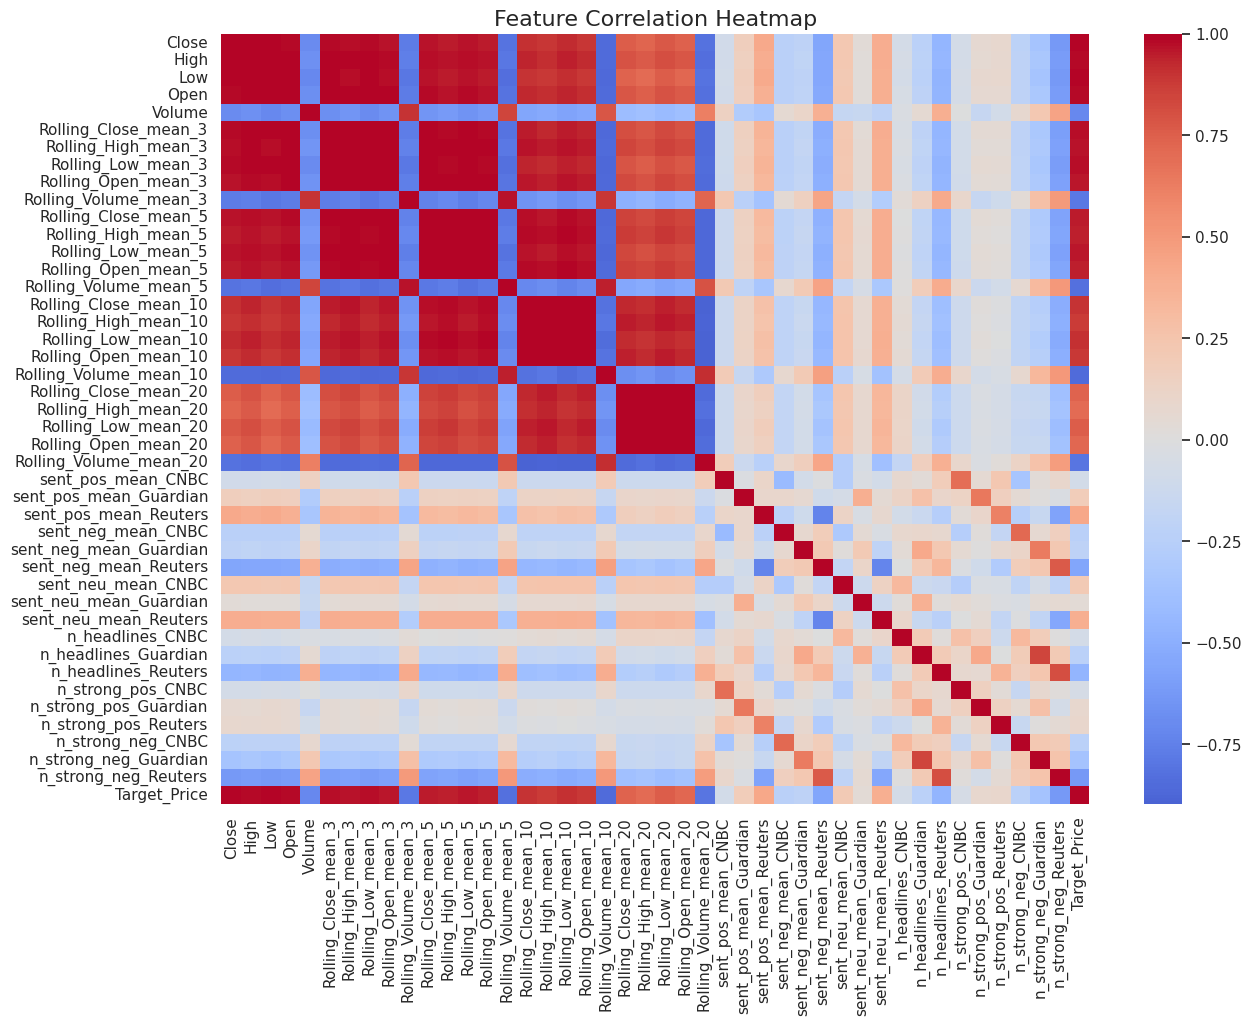


Generating SHAP Plots...
Saved: /content/drive/MyDrive/BTT_Proj/images/shap_summary_Lasso.png


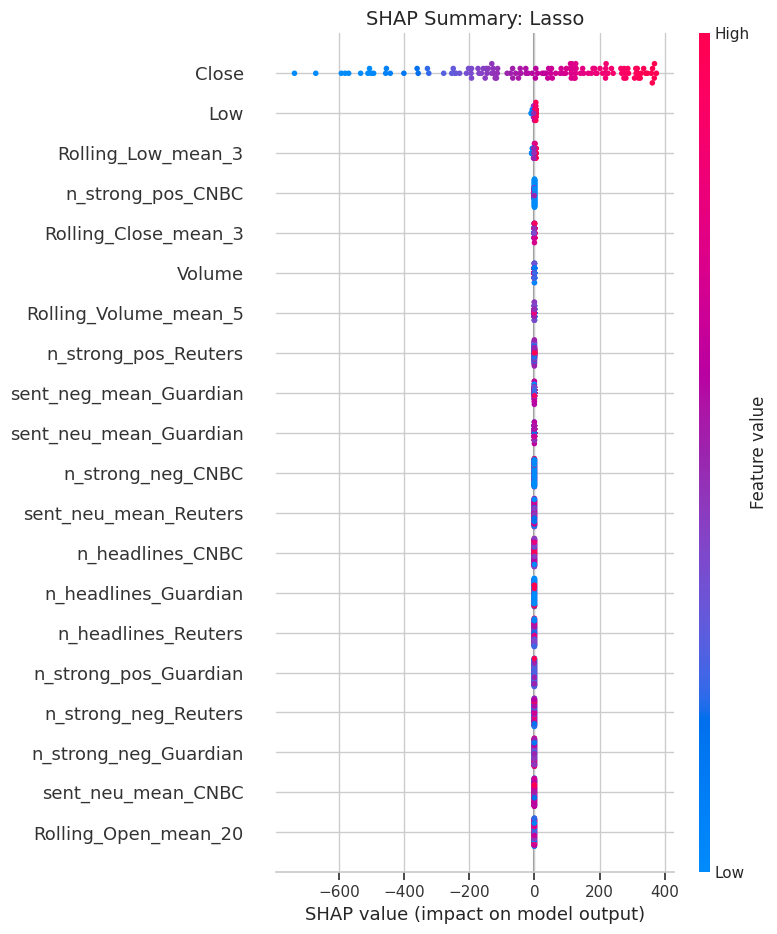

Saved: /content/drive/MyDrive/BTT_Proj/images/shap_summary_Random_Forest.png


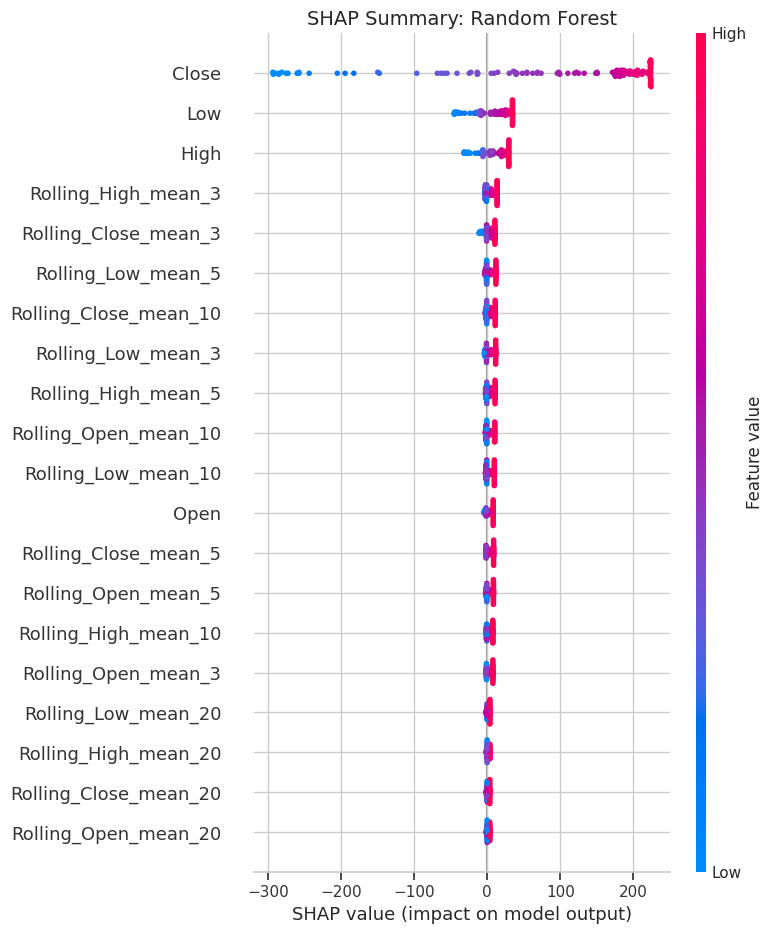

Saved: /content/drive/MyDrive/BTT_Proj/images/shap_summary_XGBoost.png


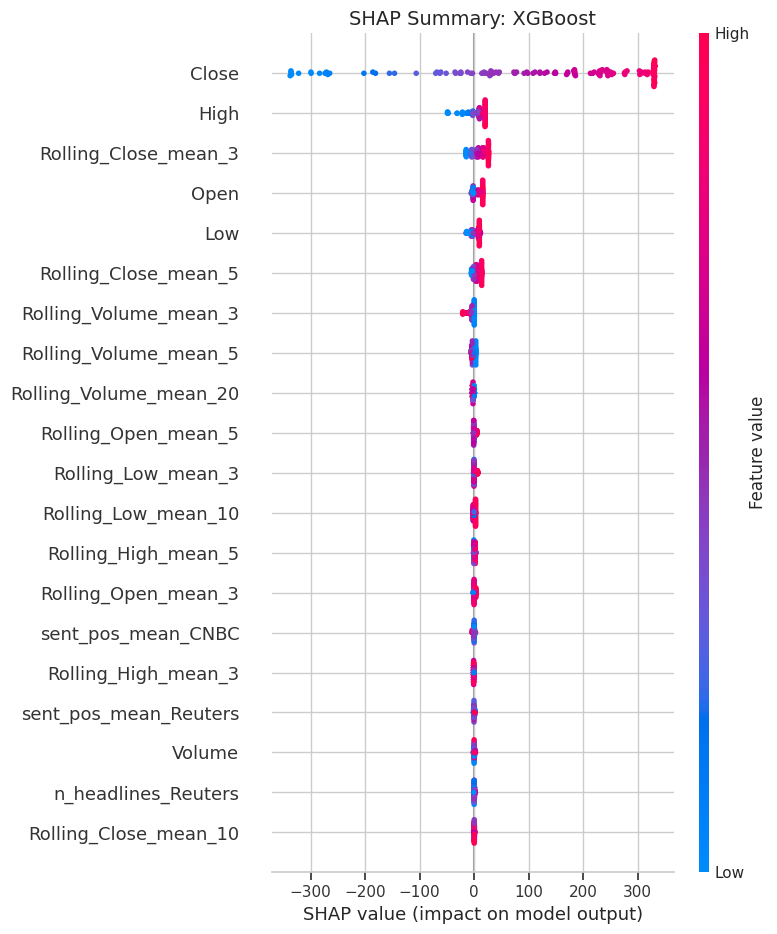

In [ ]:

# ==========================================
# 0. CONFIGURATION & SAVE PATH
# ==========================================
# Define where to save images
image_save_dir = '/content/drive/MyDrive/BTT_Proj/images'

# Create directory if it doesn't exist
if not os.path.exists(image_save_dir):
    os.makedirs(image_save_dir)
    print(f"Created directory: {image_save_dir}")
else:
    print(f"Saving images to: {image_save_dir}")

# Setup plotting style
sns.set(style="whitegrid")
plot_len = 100
shap_sample_size = 200

# Load Scaler check
if 'scaler' not in globals():
    import pickle
    try:
        scaler = pickle.load(open('/content/drive/MyDrive/BTT_Proj/models/scaler.pkl', 'rb'))
    except:
        print("Warning: Scaler not found.")

# ==========================================
# 1. CALCULATE METRICS
# ==========================================
predictions = {}
metrics_list = []

print("Running predictions...")

for name, model in models_dict.items():
    if name == 'Lasso' and 'scaler' in globals():
        X_input = scaler.transform(X_test)
    else:
        X_input = X_test

    try:
        y_pred = model.predict(X_input)
        if isinstance(y_pred, (list, tuple)): y_pred = np.array(y_pred)
        y_pred = y_pred.ravel()
        predictions[name] = y_pred

        metrics_list.append({
            'Model': name,
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'MAE': mean_absolute_error(y_test, y_pred),
            'R2': 100 * r2_score(y_test, y_pred)
        })
    except Exception as e:
        print(f"Error {name}: {e}")

metrics_df = pd.DataFrame(metrics_list)

# ==========================================
# 2. DASHBOARD (Time Series, Scatters, Metrics)
# ==========================================
print("Generating Performance Dashboard...")

fig = plt.figure(figsize=(24, 18), constrained_layout=True)
gs = fig.add_gridspec(3, 3)

ax_ts = fig.add_subplot(gs[0, :])
ax_sc1 = fig.add_subplot(gs[1, 0])
ax_sc2 = fig.add_subplot(gs[1, 1])
ax_sc3 = fig.add_subplot(gs[1, 2])
ax_met = fig.add_subplot(gs[2, :])

# A. Time Series
y_test_subset = y_test[-plot_len:]
dates_subset = y_test.index[-plot_len:] if hasattr(y_test, 'index') else range(plot_len)
ax_ts.plot(dates_subset, y_test_subset, label='Actual Price', color='black', lw=2.5, ls='--')
colors = {'Lasso': '#1f77b4', 'Random Forest': '#2ca02c', 'XGBoost': '#d62728'}

for name, y_pred in predictions.items():
    ax_ts.plot(dates_subset, y_pred[-plot_len:], label=name, color=colors.get(name, 'blue'), alpha=0.7)
ax_ts.set_title(f'Actual vs Predicted (Last {plot_len} Days)', fontsize=18)
ax_ts.legend()

# B. Scatter Plots
axes_list = [ax_sc1, ax_sc2, ax_sc3]
model_list = ['Lasso', 'Random Forest', 'XGBoost']

for i, name in enumerate(model_list):
    ax = axes_list[i]
    if name in predictions:
        y_pred = predictions[name]
        sns.scatterplot(x=y_test, y=y_pred, ax=ax, color=colors.get(name), alpha=0.5)
        min_v, max_v = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
        ax.plot([min_v, max_v], [min_v, max_v], 'k--')
        ax.set_title(f'{name} Scatter', fontsize=14)
        ax.set_ylabel('Predicted')
        ax.set_xlabel('Actual')

# C. Metrics
metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(x="Metric", y="Score", hue="Model", data=metrics_melted, ax=ax_met, palette=colors)
ax_met.set_title('Performance Metrics Comparison', fontsize=16)
ax_met.set_ylim(bottom=0)

# --- SAVE DASHBOARD ---
save_path = os.path.join(image_save_dir, 'model_performance_dashboard.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Saved: {save_path}")
plt.show()

# ==========================================
# 3. HEATMAP
# ==========================================
print("\nGenerating Heatmap...")
plt.figure(figsize=(14, 10))
df_corr = X_test.copy() if hasattr(X_test, 'copy') else pd.DataFrame(X_test)
df_corr['Target_Price'] = y_test.values if hasattr(y_test, 'values') else y_test
sns.heatmap(df_corr.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Feature Correlation Heatmap", fontsize=16)

# --- SAVE HEATMAP ---
save_path = os.path.join(image_save_dir, 'feature_heatmap.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Saved: {save_path}")
plt.show()

# ==========================================
# 4. SHAP PLOTS
# ==========================================
print("\nGenerating SHAP Plots...")
X_sample = X_test.iloc[:shap_sample_size] if hasattr(X_test, 'iloc') else X_test[:shap_sample_size]

for name, model in models_dict.items():
    try:
        # Create a new figure explicitly
        fig = plt.figure()

        if name == 'Lasso':
            if 'scaler' in globals():
                X_sample_scaled = scaler.transform(X_sample)
                explainer = shap.LinearExplainer(model, X_sample_scaled)
                shap_values = explainer.shap_values(X_sample_scaled)
                input_data = X_sample_scaled
            else:
                continue
        else:
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_sample)
            input_data = X_sample

        if isinstance(shap_values, list): shap_values = shap_values[0]

        plt.title(f"SHAP Summary: {name}", fontsize=14)
        shap.summary_plot(shap_values, input_data, feature_names=X_test.columns, show=False)

        # --- SAVE SHAP ---
        # Note: shap.summary_plot writes to the current active figure
        save_path = os.path.join(image_save_dir, f'shap_summary_{name.replace(" ", "_")}.png')
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved: {save_path}")

        plt.show()

    except Exception as e:
        print(f"Error SHAP {name}: {e}")

Generating Residual Plots...
✅ Residual plots saved successfully to: /content/drive/MyDrive/BTT_Proj/images/model_residuals_plot.png


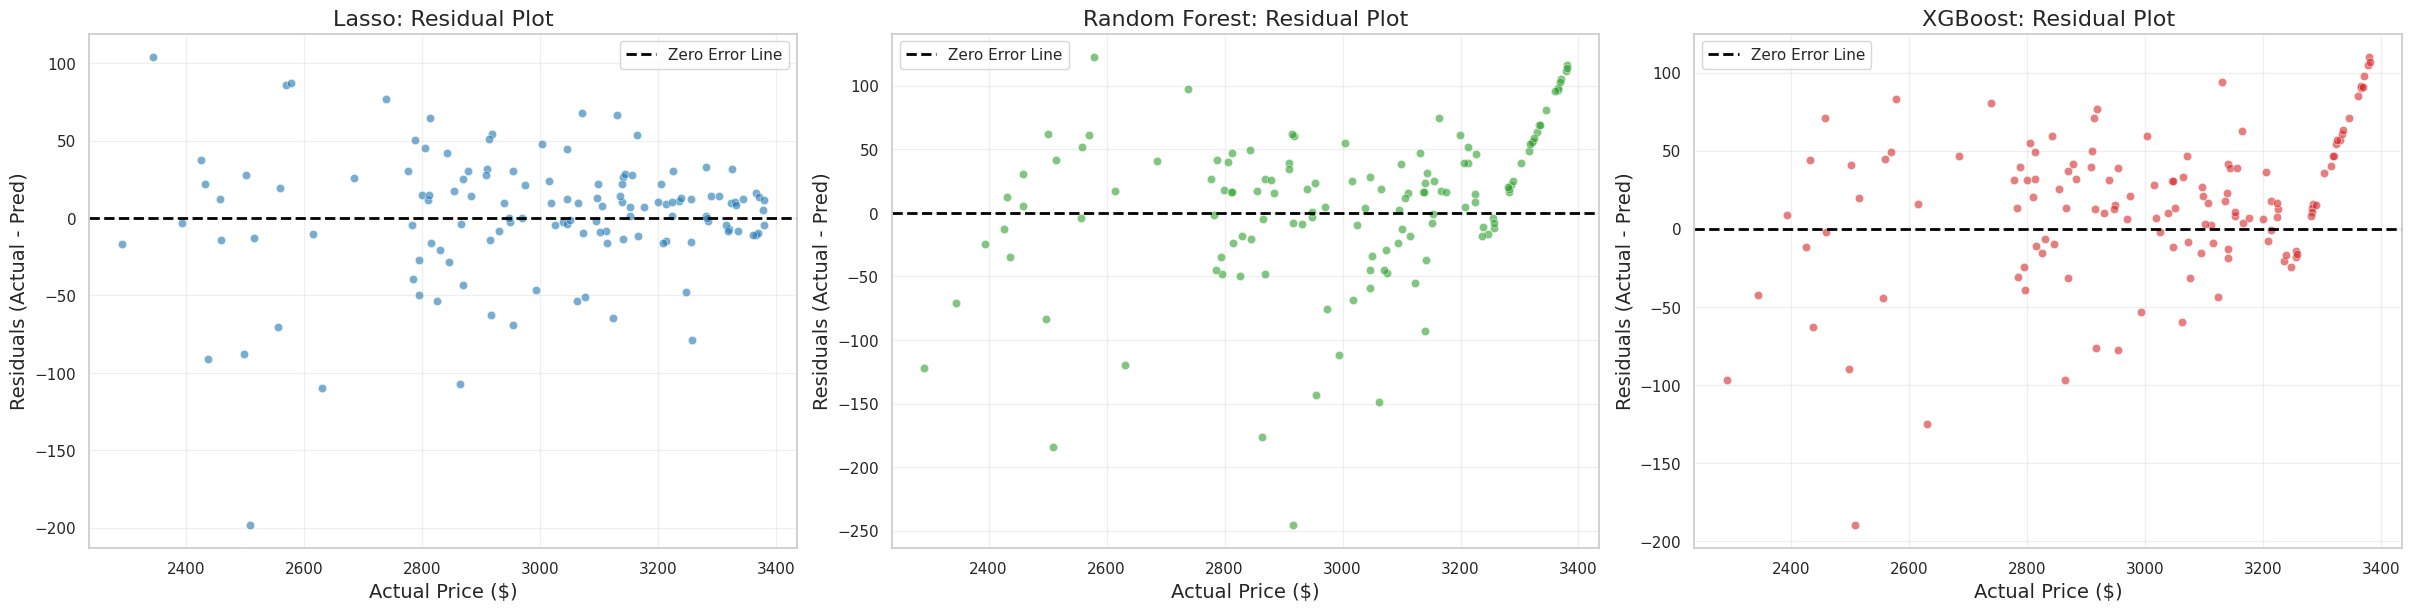

In [ ]:
# ==========================================
# CONFIGURATION
# ==========================================
image_save_dir = '/content/drive/MyDrive/BTT_Proj/images'
if not os.path.exists(image_save_dir):
    os.makedirs(image_save_dir)

if 'predictions' not in globals() or not predictions:
    print("Error: 'predictions' dictionary not found. Please run the model evaluation code block first.")
else:
    print("Generating Residual Plots...")

# ==========================================
# GENERATE RESIDUAL PLOTS (Actual vs Residuals)
# ==========================================

fig, axes = plt.subplots(1, 3, figsize=(24, 6), constrained_layout=True)

models_list = ['Lasso', 'Random Forest', 'XGBoost']
colors = {'Lasso': '#1f77b4', 'Random Forest': '#2ca02c', 'XGBoost': '#d62728'}

for i, name in enumerate(models_list):
    ax = axes[i]

    if name in predictions:
        y_pred = predictions[name]

        y_true = y_test.values if hasattr(y_test, 'values') else y_test
        residuals = y_true - y_pred

        sns.scatterplot(x=y_true, y=residuals, ax=ax, color=colors.get(name), alpha=0.6, edgecolor='w')

        ax.axhline(0, color='black', linestyle='--', linewidth=2, label='Zero Error Line')


        ax.set_title(f'{name}: Residual Plot', fontsize=16)
        ax.set_xlabel('Actual Price ($)', fontsize=14)
        ax.set_ylabel('Residuals (Actual - Pred)', fontsize=14)
        ax.legend()

        ax.grid(True, alpha=0.3)

    else:
        ax.text(0.5, 0.5, f'{name} data missing', ha='center', fontsize=12)

# ==========================================
# SAVE TO DRIVE
# ==========================================
save_path = os.path.join(image_save_dir, 'model_residuals_plot.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

print(f"✅ Residual plots saved successfully to: {save_path}")
plt.show()